<a href="https://colab.research.google.com/github/Akash-mahandargi/PCA/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
df = pd.read_excel('/content/heart_disease.xlsx')
print(df.head())
print(df.shape)
print(df.info())


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
(12, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Step 2: Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 4: Histogram (only for numeric columns)
if not numeric_df.empty:
    numeric_df.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()
else:
    print("⚠️ No numeric columns available for histogram.")

# Step 5: Boxplot for numeric columns
if not numeric_df.empty:
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=numeric_df)
    plt.title("Boxplot for Numerical Features")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("⚠️ No numeric columns available for boxplot.")

# Step 6: Correlation heatmap
if not numeric_df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("⚠️ No numeric columns available for correlation heatmap.")



Missing values per column:
 age             0
Age in years    0
dtype: int64

Summary Statistics:
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1
⚠️ No numeric columns available for histogram.
⚠️ No numeric columns available for boxplot.
⚠️ No numeric columns available for correlation heatmap.


In [71]:
print(df.dtypes)


age             object
Age in years    object
dtype: object


In [72]:
# Convert columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


/tmp/ipython-input-72-724620922.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [73]:
from sklearn.preprocessing import LabelEncoder

# 1. Check column data types again
print(df.dtypes)


age             object
Age in years    object
dtype: object


In [74]:
# Fill missing values in numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [75]:
# Automatically label encode all object (categorical) columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])


In [76]:
print(df.dtypes)  # Should now show all int or float
print(df.head())  # Preview cleaned data


age             int64
Age in years    int64
dtype: object
   age  Age in years
0    0             2
1    2             1
2   11             3
3    1             6
4    4             0


In [77]:
print("📋 Column Names:\n", df.columns.tolist())


📋 Column Names:
 ['age', 'Age in years']


In [78]:
print(df.columns.tolist())


['age', 'Age in years']


In [79]:
['age', 'sex', 'cp', ..., 'num ']  # Note extra spaces!


['age', 'sex', 'cp', Ellipsis, 'num ']

In [80]:
# Remove spaces or newline from column names
df.columns = df.columns.str.strip()


In [81]:
# Print column names with indexes to inspect them clearly
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")


0: 'age'
1: 'Age in years'


In [82]:
import pandas as pd

# Load Excel file object
xls = pd.ExcelFile('/content/heart_disease.xlsx')

# Show available sheet names
print("📄 Sheet names in Excel:", xls.sheet_names)



📄 Sheet names in Excel: ['Description', 'Heart_disease']


In [83]:
df = pd.read_excel(xls, sheet_name='Heart_disease')  # update this if needed


In [84]:
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")


0: 'age'
1: 'sex'
2: 'cp'
3: 'trestbps'
4: 'chol'
5: 'fbs'
6: 'restecg'
7: 'thalch'
8: 'exang'
9: 'oldpeak'
10: 'slope'
11: 'thal'
12: 'num'


In [85]:
df.columns = df.columns.str.strip()   # removes spaces


In [86]:
df.rename(columns={'num': 'target'}, inplace=True)  # adjust if it's 'Num', 'Num ', etc.


In [87]:
X = df.drop('target', axis=1)
y = df['target']


In [88]:
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'target']


In [89]:
print(df.dtypes)


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
target        int64
dtype: object


In [90]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        # Convert string representations of booleans to actual booleans
        df[col] = df[col].replace({'TRUE': True, 'FALSE': False, 'True': True, 'False': False})
        # Convert to string type to handle potential mixed types after boolean conversion
        df[col] = df[col].astype(str)
        df[col] = label_encoder.fit_transform(df[col])

In [91]:
X = df.drop('target', axis=1)  # or whatever your target column is
y = df['target']

# Split and train
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.510989010989011
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        89
           1       0.36      0.44      0.40        48
           2       0.21      0.23      0.22        22
           3       0.29      0.24      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.52      0.51      0.52       182



In [92]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit to training data
grid_search.fit(X_train, y_train)

# Show best parameters
print("🔍 Best Parameters:", grid_search.best_params_)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict using best model
y_pred_best = best_model.predict(X_test)

# Evaluate best model
from sklearn.metrics import accuracy_score, classification_report

print("✅ Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("✅ Tuned Model Report:\n", classification_report(y_test, y_pred_best))


🔍 Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
✅ Tuned Model Accuracy: 0.5714285714285714
✅ Tuned Model Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        89
           1       0.37      0.52      0.43        48
           2       0.36      0.23      0.28        22
           3       0.20      0.06      0.09        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.34      0.33      0.32       182
weighted avg       0.53      0.57      0.54       182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


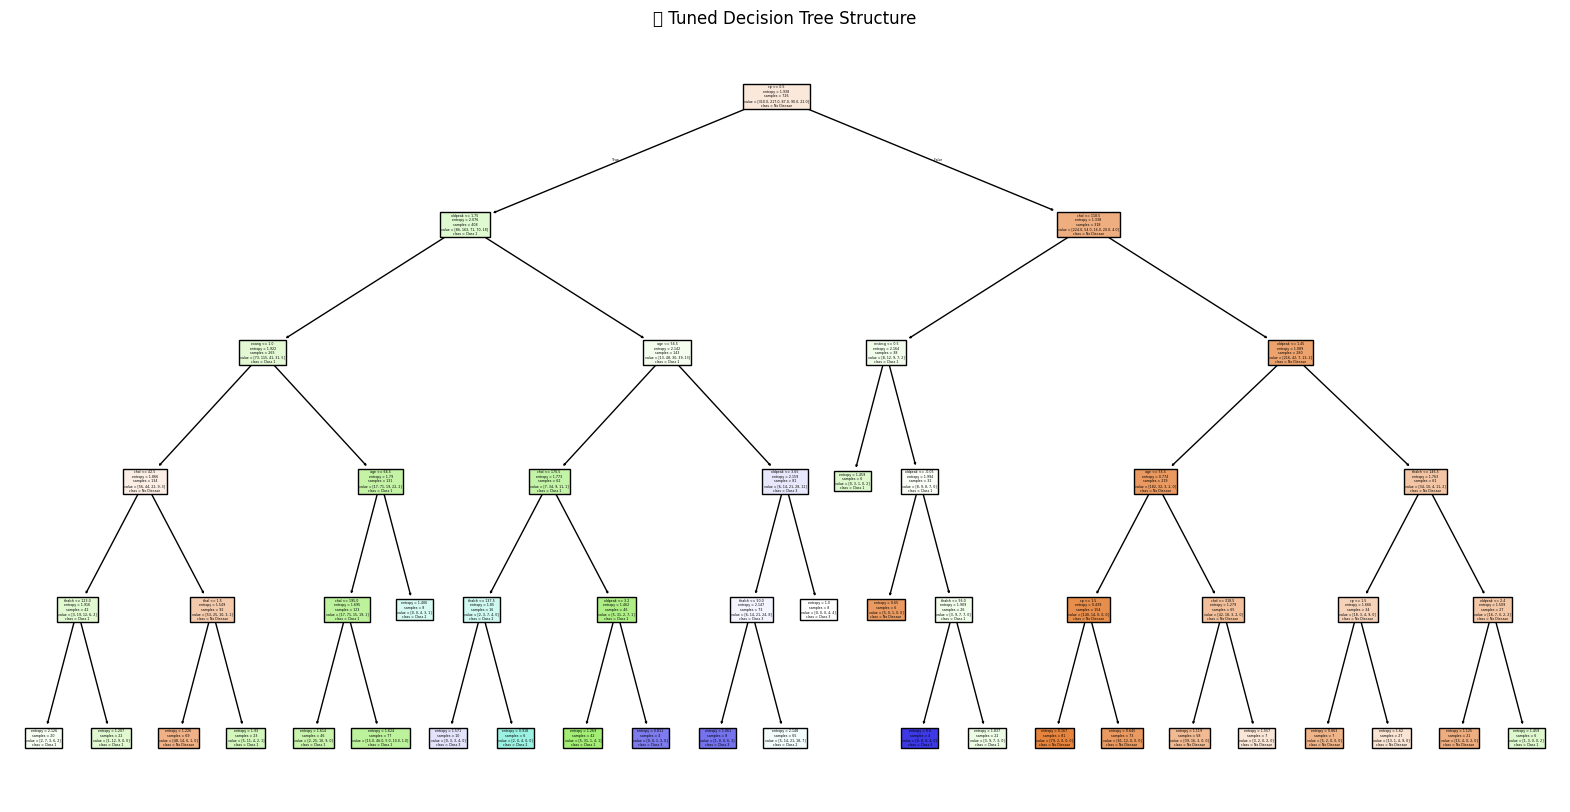

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
# Updated class_names to match the number of unique classes in the target variable
# Replace 'Class 1', 'Class 2', etc. with actual class names if known
plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], filled=True)
plt.title("🌳 Tuned Decision Tree Structure")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


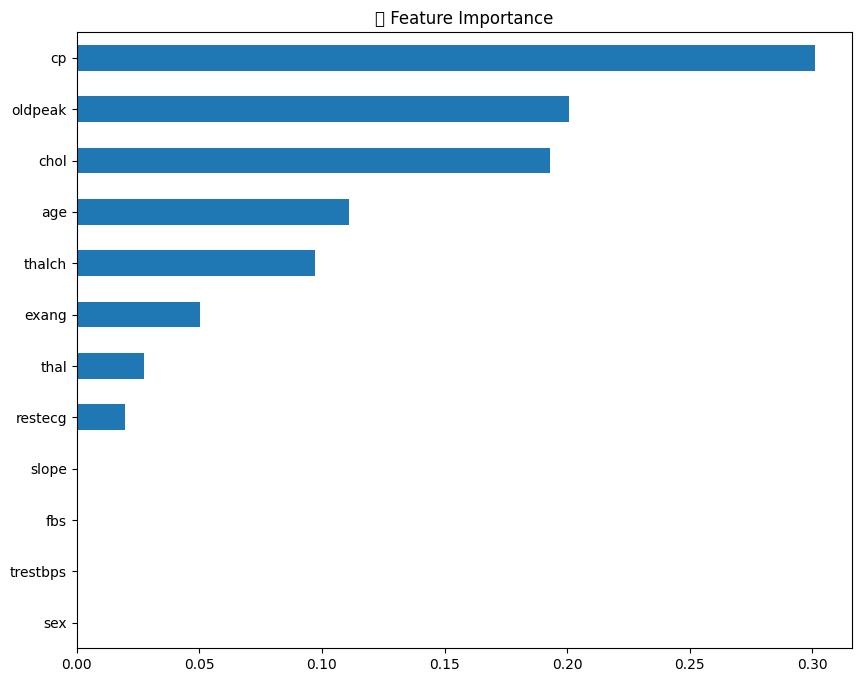

In [94]:
import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)

# Plot
feature_importance.plot(kind='barh', figsize=(10, 8), title="🔍 Feature Importance")
plt.show()
